# Do Females employees make less money? 
### Exploring Survey Data in Python 

*Jonathan M. Cabreira*

### Survey Data Analysis using pandas, seaborn , matplotlib and scipy

This is my first post on Medium and because of that, I decided to practice some statistics with survey data. In order to do that, I'm going to use the Brent Ozar salary survey, which is released every year since 2017, as far as I am aware. The main idea here is to answer the following question : **Do Females employees make less money than male employees?**. Many people would say *"Yes! They definitely do!"*, others might say *"Of course female make less money!"*. Well, it seems to me that when we make this kind of statement, we must be concerned about something called confirmation bias. In other words, if you believe that women are underpaid in comparison to man, there is a chance that you will assume this statement without deep analysis into the quality of the data you are working on.

We'll be using pandas, matplotlib, seaborn and scipy to make sense of our data. Moreover, we'll also be using The 2019 Data Professional Salary Survey Results and you can find it at https://www.brentozar.com/archive/2019/01/the-2019-data-professional-salary-survey-results/.

Take this post as an approach that can help you to analyse some surveys and others any other data you want to statistically examine. 

# Data Exploration

Let's first import some libraries that we will need and then explore the data.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')
#Ignore woarnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
raw_data = pd.read_excel('2019_Data_Professional_Salary_Survey_Responses.xlsx',header = 3)
raw_data.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2017,2017-01-05 05:10:20.451,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
1,2017,2017-01-05 05:26:23.388,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
2,2017,2017-01-05 05:32:57.367,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
3,2017,2017-01-05 05:33:03.316,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,...,40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,2017-01-05 05:34:33.866,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,...,40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


In [3]:
#Let's take a look at the data type and check if there are nan variables in the data set
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 29 columns):
Survey Year                             6893 non-null int64
Timestamp                               6893 non-null datetime64[ns]
SalaryUSD                               6893 non-null object
Country                                 6893 non-null object
PostalCode                              5934 non-null object
PrimaryDatabase                         6893 non-null object
YearsWithThisDatabase                   6893 non-null int64
OtherDatabases                          5520 non-null object
EmploymentStatus                        6893 non-null object
JobTitle                                6893 non-null object
ManageStaff                             6893 non-null object
YearsWithThisTypeOfJob                  6893 non-null int64
HowManyCompanies                        6893 non-null object
OtherPeopleOnYourTeam                   6893 non-null object
CompanyEmployeesOverall           

As we can see below, we have some columns with missing values. This is not an issue for us , due to the fact that we won't be using these features ( columns ) in our analysis.

In [4]:
raw_data.isnull().sum()

Survey Year                                0
Timestamp                                  0
SalaryUSD                                  0
Country                                    0
PostalCode                               959
PrimaryDatabase                            0
YearsWithThisDatabase                      0
OtherDatabases                          1373
EmploymentStatus                           0
JobTitle                                   0
ManageStaff                                0
YearsWithThisTypeOfJob                     0
HowManyCompanies                           0
OtherPeopleOnYourTeam                      0
CompanyEmployeesOverall                    0
DatabaseServers                            0
Education                                  0
EducationIsComputerRelated              1216
Certifications                             0
HoursWorkedPerWeek                         0
TelecommuteDaysPerWeek                     0
PopulationOfLargestCityWithin20Miles       0
Employment

The first thing that catches my eye is the SalaryUSD column. This feature must be numerical, and in order to do some math with this data, we have to convert them into float.In addition, after a few observations I've noticed that there are some characteres in the Salary column that should be deleted. Also, due to the fact that some rows have been identified as integer and others as float, I've created a function to treat all this data convert them into string and then, convert the entire column into float. Finally, all the spaces (' ') on the column labels of the DataFrame have been replaced with an underscore ('_'). 

In [5]:
#Convert all of the salary rows into string
def str_salary(salary):
    sep = '.'
    if type(salary) == int:
        salary = str(salary)
    elif type(salary) == str:
        # Replace characteres and take the cents out of our data
        salary = salary.replace(" ","").replace("$","").replace(",","").split(sep)[0]
    elif type(salary) == float:
        salary = str(salary)
        
    return salary

In [6]:
# Replace spaces(" ") in columns name with underscore ("_")
raw_data.columns = raw_data.columns.str.replace(" ","_")

In [7]:
# Apply str_salary function
raw_data['SalaryUSD'] = raw_data.SalaryUSD.apply(str_salary)
raw_data['SalaryUSD'].head()

0    200000
1     61515
2     95000
3     56000
4     35000
Name: SalaryUSD, dtype: object

In [8]:
#Convert the salary column into float
raw_data['SalaryUSD'] = raw_data.SalaryUSD.astype(float)
raw_data['SalaryUSD'].head()

0    200000.0
1     61515.0
2     95000.0
3     56000.0
4     35000.0
Name: SalaryUSD, dtype: float64

In order to analyse only 2019 data, we will filter the dataframe by year and  by the columns that are relevant to our analysis.

In [9]:
df = raw_data.loc[raw_data.Survey_Year == 2019, ['Survey_Year','Country','SalaryUSD','JobTitle','YearsWithThisTypeOfJob','Education','Certifications','PopulationOfLargestCityWithin20Miles', 'Gender' ]]
df.head()

,Survey_Year,Country,SalaryUSD,JobTitle,YearsWithThisTypeOfJob,Education,Certifications,PopulationOfLargestCityWithin20Miles,Gender
6011,2019,United States,128500.0,Architect,15,Bachelors (4 years),"No, I never have",300K-1M (large city),Male
6012,2019,United Kingdom,52922.0,"DBA (Development Focus - tunes queries, indexe...",2,Bachelors (4 years),"No, I never have",300K-1M (large city),Male
6013,2019,United States,110000.0,"DBA (Development Focus - tunes queries, indexe...",18,Bachelors (4 years),"Yes, and they're currently valid",1M+ (metropolis),Male
6014,2019,United Kingdom,73000.0,DBA (Production Focus - build & troubleshoot s...,8,None (no degree completed),"No, I never have",1M+ (metropolis),Male
6015,2019,United States,65000.0,Developer: T-SQL,3,None (no degree completed),"Yes, and they're currently valid",100K-299K (city),Male


Since we have defined our dataframe, we are now able to get some information. First, let's count the numbers of employees by country and work on the one on which we have more data. Second, we'll count the number of employees **by** job title and finally, count the total of men and women. 

In [10]:
# Answers by Country
df.Country.value_counts()

United States            602
United Kingdom            72
Canada                    29
Australia                 25
Germany                   17
Ukraine                   13
Netherlands               11
New Zealand               11
Switzerland                9
Poland                     9
Romania                    8
Denmark                    7
Sweden                     6
Belgium                    5
Ireland                    4
South Africa               4
Spain                      4
Greece                     3
Slovenia                   3
Hungary                    3
Norway                     3
India                      2
Italy                      2
France                     2
Finland                    2
Brazil                     2
Serbia and Montenegro      2
Israel                     2
Portugal                   2
Czech Republic             2
Macedonia                  1
Slovakia                   1
Jersey                     1
Hong Kong                  1
Guernsey      

As we can see, we have way more employees from US in this survey and, because of that we'll filter our dataframe in order to **work only with the United States data.** 

In [11]:
#Filter dataframe by country
US_2019 = df.loc[df.Country == 'United States',:]
US_2019.head(3)

,Survey_Year,Country,SalaryUSD,JobTitle,YearsWithThisTypeOfJob,Education,Certifications,PopulationOfLargestCityWithin20Miles,Gender
6011,2019,United States,128500.0,Architect,15,Bachelors (4 years),"No, I never have",300K-1M (large city),Male
6013,2019,United States,110000.0,"DBA (Development Focus - tunes queries, indexe...",18,Bachelors (4 years),"Yes, and they're currently valid",1M+ (metropolis),Male
6015,2019,United States,65000.0,Developer: T-SQL,3,None (no degree completed),"Yes, and they're currently valid",100K-299K (city),Male


So, let's take a look at the number of **employees by their genders** and see if we can take some information out of it. Are the number of female and male employees equal or,at least, is it close to equal ? Lets check this out!  

In [12]:
US_2019.Gender.value_counts()

Male                       541
Female                      60
Non-binary/third gender      1
Name: Gender, dtype: int64

It seems that we have an issue here. Unfortunately,the total number of males is way greater than the total of females. Also, we are not able to get any statistical information from the non-binary gender due to the fact that only one non-binary person answerd the survey in 2019. So, let's drop this specific row and focus only on two genders.

In [13]:
# Delet the row - Non-binary/third gender
US_2019 = US_2019[US_2019.Gender != 'Non-binary/third gender']
US_2019.Gender.value_counts()


Male      541
Female     60
Name: Gender, dtype: int64

OK, we already know that (unfortunately) the number of female is way lower than the number of male. Lets now answer the following question: how are the genders distributed in terms of job title ? Let's first count the number of employess in each position. 



In [14]:
# Job Titles 
US_2019.JobTitle.value_counts()

DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)    157
DBA (Production Focus - build & troubleshoot servers, HA/DR)                                                   97
Developer: T-SQL                                                                                               61
Architect                                                                                                      50
Analyst                                                                                                        49
Developer: Business Intelligence (SSRS, PowerBI, etc)                                                          47
DBA (Development Focus - tunes queries, indexes, does deployments)                                             40
Manager                                                                                                        36
Developer: App code (C#, JS, etc)                                                       

To my surprise, we have only 4 Data Scientists and 21 Engineers... Ok, let's not consider this! So, now we have an overview of job titles in this survey. How about the distribution of gender by job title? Let's check this out!


In [15]:
# number of each gender by job title
Gender_df = US_2019.loc[ : , ['JobTitle', 'Gender', 'SalaryUSD' ]]
Count_gender = Gender_df.pivot_table(Gender_df, index = ['JobTitle', 'Gender'], aggfunc= 'count')
Count_gender

SalaryUSD
JobTitle                                           Gender           
Analyst                                            Female          6
                                                   Male           43
Architect                                          Female          3
                                                   Male           47
DBA (Development Focus - tunes queries, indexes... Female          4
                                                   Male           36
DBA (General - splits time evenly between writi... Female         18
                                                   Male          139
DBA (Production Focus - build & troubleshoot se... Female         13
                                                   Male           84
Data Scientist                                     Male            4
Developer: App code (C#, JS, etc)                  Male           30
Developer: Business Intelligence (SSRS, PowerBI... Female          4
                                                   Male           43
Developer: T-SQL                                   Female          7
                                                   Male           54
Engineer                                           Female          2
                                                   Male           19
Manager                                            Female          2
                                                   Male           34
Other                                              Female          1
                                                   Male            8

I don't know about you guys, but I am the visual kind of learner and that's the reason why I really like to build graphs and tables. We can use the seaborn library to build a bar chart with the information we have just checked.

Text(0.5, 0, 'Salary USD')

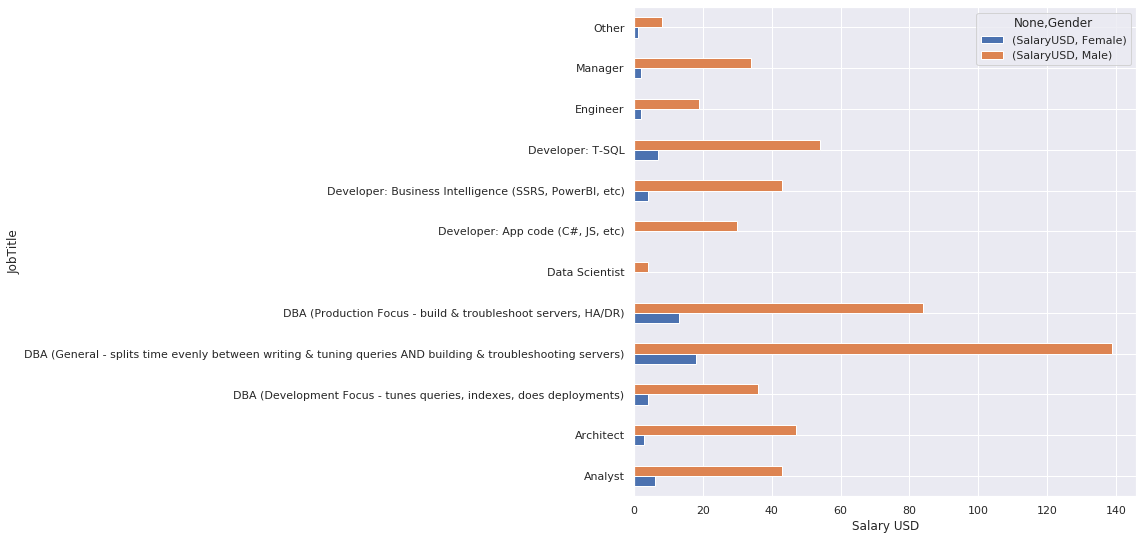

In [16]:
import seaborn as sns
# use Seaborn styles
sns.set()
pd.pivot_table(Gender_df, index= 'JobTitle', columns= 'Gender', aggfunc= 'count').plot(kind= 'barh', figsize= (9,9))
plt.xlabel("Salary USD")


The chart above ** clearly shows** a gap between genders, not only regarding the employees  who have answerd this survey in general but also concerning job titles. Have you noticed this in your company?




Great.Now we know that there are 541 males and 60 female in our survey and we also know that there are way more male employees in all of the positions. It's important to notice that we cannot guarantee that these facts are absolutely true because we don't know how exactly the survey was conducted. Moreover, we have to be aware of the representativeness of our online samples so that we can trust in the validity of conclusions derived from our internet survey data. In other words, the data might be biased.

For instance, when conducting a survey, we are prone to over-sample some kinds of people ( employees in this case) and under-sample others. Not all endividuals know Brent Ozar's website - the one responsible for the survey, and others are more unlikely to participate in this survey if this kind of subject matter does not interests them.

We could try to deal with this issue using statistic techniques such as weighting, to compansate for this type of 'sampling bias'. This is not the case of our analysis, we will just draw some straightforward insights from our data and practice some basic statistics since we are not really worried about that topic.


# Salary 

It's time look to at the salary data so we can check if there is gap **in it**. It's important to bear in mind that we won't  take into account some features such as years of experience, education and size of the company because we just want to answer the simple question : **Is there a gap between female and male salaries?** I would use those features, for example, to answer **why** there is or there isn't a gap between the genders.That being said, let's **work with** the salary column for our analysis.

A histogram shows frequency for intervals of values of a metric variable by grouping data into bins. Lets take a look at the distribution of the salary.  How do you expect it to be ? well, I would suppose that it looks like a gaussian distribution positively skewed with very few employees making more than a specific threshold ( maybe $ 150k).


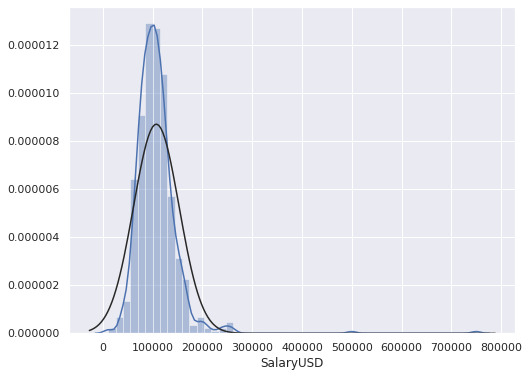

In [19]:
#Import sub-package stats from scipy library
from scipy import stats
plt.figure(figsize=(8,6))
ax = sns.distplot(US_2019.SalaryUSD, fit = stats.norm)

In [18]:
#Import sub-package stats from scipy library
#from scipy import stats
#sns.distplot(US_2019.SalaryUSD, fit = stats.norm)

Good guess! The histogram above is similar(not exactly the same) to what I've expected.The data looks close to a normal distribution or, at least, it seems to be bell-shaped. Is it normal? Let's check it.


## Normality Test

We will test the normality of our data through one qualitative analyses ( Q-Q plot) and two quantitative tests (Shapiro-Wilk and D'Agosino's k2 tests).


### Qualitative Normality Test 

### Q-Q Test

The Q-Q plot is a popular plot for checking the data distribution. The Quantile-Quantile plot or Q-Q plot generate it's own sample of the distrution we are comparing it with ( Normal distributio in this case). The genarated sample is divided into quantiles and each data point in the sample is combined with a similar member from the distribution we are comparing with at the same cumulative distribution. As a result, we have a scatter plot with the theoretical values on the x-axis and the data sample quantiles on the y-axis.


For more information about q-q plot, check this out:
https://data.library.virginia.edu/understanding-q-q-plots/

http://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

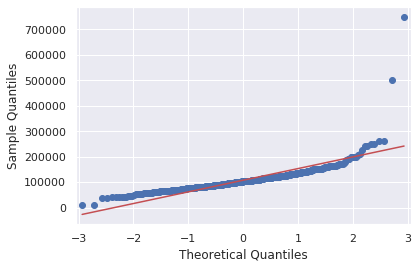

In [26]:
#Import qqplot
from statsmodels.graphics.gofplots import qqplot
qqplot(US_2019.SalaryUSD, line = 's');

So, how do we interpret this plot? Well, deviations of the blue dots from the red line show a deviation from the distribution we are comparing with (gaussian). Based on this, we can say that our feature does not seem to be a good match for normal distribution. If the data were normally distributed, most of the blue points would be on the red line,which is not the case.Even though there are many blue points on the line, there are many more not on it. This indicates that the data would assume a different distrution, as we have observed in the histogram.


 # Quantitative Normality Test

In addition to the preveous analysis, we will use two quantitative tests to check the normality of our data. Let's start with the Shapiro-Wilk Test which evaluates an specific sample and quantifies how likely it is that the data will follow a normal distribution. As far as I know, Shapiro-Wilk test is not only a reliable test but also a widely used one and we can apply it using the shapiro() function from SciPy library. This function returns both the W-statistics calculated by the test and the p-value.

The Second test we'll use is the D'Agosino's k^2 Test. This normality test calculates the kurtosis and the skewness of the data to determine if they follow a Gaussian distribution. Basically what the test does is the combination of skew and kurtosis of the sample to produce an omnibus test of normality.For those who are not familiar with these terms, kurtosis is the quantification of how much of the distribution is in the tails, and skew is the quantification of how much the distribution is pushed right or left ( it measures the asymmetry in the distribution). In order to calculate de statistic and the p-value, we'll use the normaltest() function from SciPy library.



### Shapiro-Wilk Test

In [27]:
from scipy.stats import shapiro
statistic,p = shapiro(US_2019.SalaryUSD)
print(f'P-value: {p :<.3f}')

#For a threshold of 5% (alpha)
if p > 0.05:
    print(f'Sample looks Gaussian (fail to regect H0)')
else:
    print(f'Sample does not look gaussian ( regect H0)')


P-value: 0.000
Sample does not look gaussian ( regect H0)


###  D'Agosino's k2 Test


In [28]:
from scipy.stats import normaltest
statistic,p = normaltest(US_2019.SalaryUSD)

print(f'P-value:{p:<.3f}')


#For a threshould of 5% (alpha)
if p > 0.05:
    print(f'Sample looks Gaussian (fail to regect H0)')
else:
    print(f'Sample does not look gaussian (regect H0)')

P-value:0.000
Sample does not look gaussian (regect H0)


Since we've analysed our tests, both in qualitative and quantitative manners, we can make an assumption about the data. All of the tests and visualization techniques we've used so far **do not indicate a normal distribution.** 

source : https://web.archive.org/web/20120325140006/http://www.cee.mtu.edu/~vgriffis/CE%205620%20materials/CE5620%20Reading/DAgostino%20et%20al%20-%20normaility%20tests.pdf

# Outliers

To make sure our data represents our problem properly, we have be aware of the possibility of having ourliers in our data set. Outliers are entries that are ouside a the range of what is expected and unlike the other observations. They affect the skewness of our data distribution and, consequently, some statistical terms such as standard deviation and mean.In particular, these measures are highly sensitive to outliers due to the way they are calculated. 

Let's split our data by gender and plot a boxplot so that we will be able to ilustrate our data through their quartiles.This can also helps us to identify some potencial outliers, such as those data located ouside the whiskers in the plot.

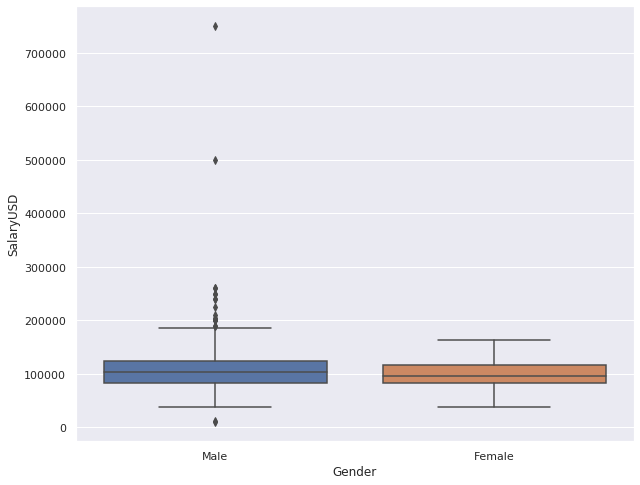

In [29]:
fig = plt.figure(figsize = (10,8))
sns.boxplot(x = 'Gender', y = 'SalaryUSD', data = US_2019)

# Statistics

Let's calculate some terms so that we can have some clue about the data.

In [30]:

def statistics(salary):
    #Import variation
    from scipy.stats import variation
    #Calculate terms
    mean = salary.mean()
    median = salary.median()
    mode = salary.mode()
    kurtosis = salary.kurtosis()
    skew = salary.skew()
    CV = variation(salary)
    #dict
    stats = [('Country', ['United States']),
             ('Mean',[round(mean,2)]),
             ('Median',[round(median,2)]),
             ('Mode',  [int(mode)]),
             ('Kurtosis',[round(kurtosis,2)]),
            ('Skew',[round(skew,2)]),
             ('Coefficient of variation',[round(CV,2)])  
            ]
    #dataframe
    stats_df = pd.DataFrame.from_items(stats)          
    return stats_df

In [31]:
# Apply statistics function
Salary_statistics = statistics(US_2019['SalaryUSD'])
Salary_statistics

,Country,Mean,Median,Mode,Kurtosis,Skew,Coefficient of variation
0,United States,107376.44,103000.0,80000,73.03,6.04,0.43


So, once we have calculated these statistics we are able to identify some characteristics of our data. First, the median and mean are greater than the mode. This means that the right tail of the distribution is longer, or in other words, the data is positive skewed. Second, the skewness of our data is greater than 1, confirming the highly skewness of it. Third, the high kurtosis in our data set indicates that its distribution has heavy tail or outliers - we have to investicate it. Finally, the coefficient of variation (CV) which is a statistic measure of the dispersion of data points in a data set around its mean, indicates that our sample has a significant variation of 43%, relative to its mean.

Up to this point, all analysis we have made give us evidence that our **data does not** follow a normal distribution. Besides, the high kurtosis can be** an indicator of outliers**. Let's investicate it. 

## Interquartile Range

We need a reasonable standard deviation for our analysis. What do I mean by that ? Well, the standard deviation represents how spread the data are from its mean and, as I've said before, this measure is highly affected by outliers. In addition, we will see later that the standard error is sensible to the standard deviation of the population and because of that we want to filter out outliers.

Right. We know that we have to filter out the outliers. But how can we do that? The answer is simple : we will use the interquatile range for that.

Interquartile Range is basically the distance between the third quartile and the first quartile. In our case, the table below shows that Q3 = $ 123.600,00 and Q1 = 83.000,00. Let's calculate the difference between them and determine our Interquartile Range (IQR).


In [32]:
#Statistics
round(US_2019.SalaryUSD.describe().to_frame(),3)

,SalaryUSD
count,601.000
mean,107376.438
std,45800.578
min,11100.000
25%,83000.000
50%,103000.000
75%,123600.000
max,750000.000


In [33]:
#Calculate the percentiles - 25 and 75 %
q75, q25 = np.percentile(US_2019.SalaryUSD , [75 ,25])
print(f'Q3:{q75}')
print(f'Q1:{q25}')
# Calculate the percentile Range
iqr = q75 - q25
print(f'Interquartile Range: {iqr}')

Q3:123600.0
Q1:83000.0
Interquartile Range: 40600.0


Now that we have our IQR we are able to filter the outliers out of our data set.We will do this considering that any data outside the range [q25 -1.5 * IQR ,q75 + 1.5*IQR] is an outlier.

In [34]:
# [q25 -1.5 * IQR q75 + 1.5*IQR] 
min_salary = q25 - 1.5*iqr
max_salary = q75 + 1.5*iqr
print(f'Minimun salary (threshould) : {min_salary}')
print(f'Maximun salary (threshould) : {max_salary}')

Minimun salary (threshould) : 22100.0
Maximun salary (threshould) : 184500.0


In [35]:
#data set within the range
US_2019_No_Outliers = US_2019[(US_2019.SalaryUSD>=min_salary) & (US_2019.SalaryUSD <= max_salary)]
US_2019_No_Outliers.head()

,Survey_Year,Country,SalaryUSD,JobTitle,YearsWithThisTypeOfJob,Education,Certifications,PopulationOfLargestCityWithin20Miles,Gender
6011,2019,United States,128500.0,Architect,15,Bachelors (4 years),"No, I never have",300K-1M (large city),Male
6013,2019,United States,110000.0,"DBA (Development Focus - tunes queries, indexe...",18,Bachelors (4 years),"Yes, and they're currently valid",1M+ (metropolis),Male
6015,2019,United States,65000.0,Developer: T-SQL,3,None (no degree completed),"Yes, and they're currently valid",100K-299K (city),Male
6017,2019,United States,116500.0,Architect,2,Masters,"Yes, and they're currently valid",1M+ (metropolis),Male
6019,2019,United States,124000.0,DBA (General - splits time evenly between writ...,15,Bachelors (4 years),"Yes, but they expired",1M+ (metropolis),Male


In [56]:
US_2019_No_Outliers[US_2019_No_Outliers.SalaryUSD > 170000]

,Survey_Year,Country,SalaryUSD,JobTitle,YearsWithThisTypeOfJob,Education,Certifications,PopulationOfLargestCityWithin20Miles,Gender
6427,2019,United States,175000.0,Manager,7,Masters,"No, I never have",1M+ (metropolis),Male
6661,2019,United States,178000.0,DBA (General - splits time evenly between writ...,23,None (no degree completed),"Yes, but they expired",300K-1M (large city),Male


In [48]:
#Statistics - no outliers
round(US_2019_No_Outliers.SalaryUSD.describe().to_frame(),3)

,SalaryUSD
count,581.000
mean,102849.120
std,27879.098
min,37500.000
25%,82000.000
50%,102000.000
75%,120000.000
max,178000.000


After the removal of outliers, we can see how our dataset has changed. First, the boxplot shows just one data point wich is within our range [22100.0 , 184500.0] so we will be considering this point as the highest value of our salar. Second the data distribution roughly represents a gaussian. Moreover, the mean is now closer to the median the Coefficient of variation is only 25% which means that our data is evenly distributed within the range we have defined.

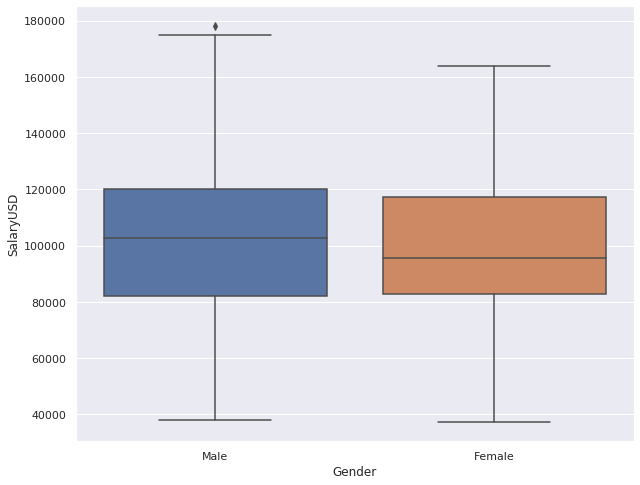

In [58]:
# Boxplot with data within the range
fig = plt.figure(figsize = (10,8))
sns.boxplot(x = 'Gender', y = 'SalaryUSD', data = US_2019_No_Outliers)

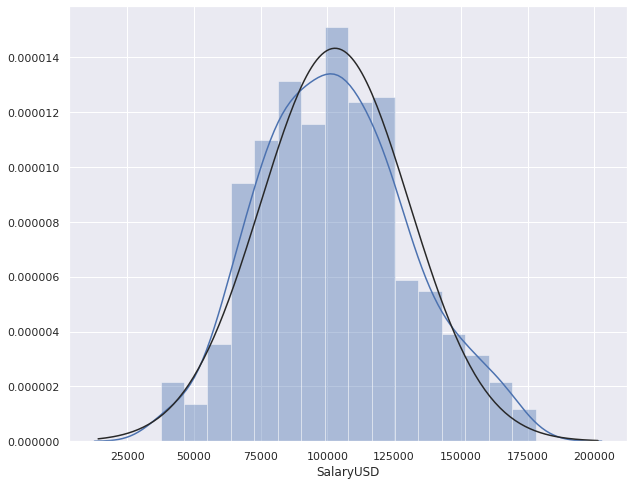

In [60]:
from scipy import stats
fig = plt.figure(figsize = (10,8))
sns.distplot(US_2019_No_Outliers.SalaryUSD, fit = stats.norm)


In [61]:
# statistical terms for data within the range
Salary_statistics_No_Outliers = statistics(US_2019_No_Outliers['SalaryUSD'])
Salary_statistics_No_Outliers

,Country,Mean,Median,Mode,Kurtosis,Skew,Coefficient of variation
0,United States,102849.12,102000.0,80000,-0.28,0.24,0.27


**Statistic sumary **

In [62]:
#Statistical terms before and after the outlier removal
Salary_statistics.append(Salary_statistics_No_Outliers)

,Country,Mean,Median,Mode,Kurtosis,Skew,Coefficient of variation
0,United States,107376.44,103000.0,80000,73.03,6.04,0.43
0,United States,102849.12,102000.0,80000,-0.28,0.24,0.27


Notice that we have removed 18 entries that were above the maximum threshould and 2 that were below the minimum threshould.  This indicate that 3% of the observations **are** responsible for causing a significant variability in our data set.

In [63]:
below_threshould = US_2019[US_2019.SalaryUSD <= min_salary]
above_threshould = US_2019[US_2019.SalaryUSD >= max_salary]
print(f'Total of salaries above the max threshould: {above_threshould.SalaryUSD.count()}')
print(f'Total of salaries below the min threshould:{below_threshould.SalaryUSD.count()}')


Total of salaries above the max threshould: 18
Total of salaries below the min threshould:2


In [64]:
print(f'Entries outside the range: { round((below_threshould.SalaryUSD.count() + above_threshould.SalaryUSD.count()) / US_2019.SalaryUSD.count()*100)} %' )



Entries outside the range: 3.0 %


Another important aspect of the outliers is that all of them are male. This suggests that **100% of the employees that make more money are male and 100% of the employees with the lowest salaries are women**. Isn't that intriguing?! 

In [70]:
above_threshould.Gender.value_counts()

Male    18
Name: Gender, dtype: int64

In [71]:
below_threshould.Gender.value_counts()

Male    2
Name: Gender, dtype: int64

# Standard Error Analysis

Now that we have a fairly balanced data set, we are able to do a Standard Error Analysis. Why would I do that ? Well, the standard Error shows us how good our data is. In other words, it measures the accuracy with which our sample represents the entire population. The formula below shows how this statistical term is calculated.

<img src="std_error.PNG" width="280" height="280" align="center"/>


Two important **things** to notice. First, the larger the sample, the closer the sample mean will match the mean of the population. Besides, we can see through the formula that if we have a larger numer of samples, the standard error will be decreased. Second, the smaller the standard deviation of a population, the smaller the standard error. As we know, the standard deviation is a measure of spread and it is **highly** affected by outliers. This means that the standard deviation of a sample will be much larger in case of existence of an outlier in our data set.

In [72]:
def mean_std_count(salary, data):
    mean = salary.mean()
    std = salary.std()
    count = salary.count()
    
    std_error = [('Gender',[data]),
                 ('Salary Mean',[round(mean,2)]),
                 ('Salary std',[round(std,2)]),
                 ('Sample',[count]) ]
    
    std_erro_df = pd.DataFrame.from_items(std_error)
    return std_erro_df

In [73]:
Female_stats = mean_std_count(US_2019_No_Outliers[US_2019_No_Outliers.Gender == 'Female'].SalaryUSD, 'Female')
Male_stats = mean_std_count(US_2019_No_Outliers[US_2019_No_Outliers.Gender == 'Male'].SalaryUSD, 'Male')
Salary_stats = mean_std_count(US_2019_No_Outliers.SalaryUSD, 'Total')
Female_stats.append(Male_stats).append(Salary_stats)


,Gender,Salary Mean,Salary std,Sample
0,Female,98405.37,28276.27,60
0,Male,103360.88,27814.88,521
0,Total,102849.12,27879.10,581


The table above shows us that we've got a gap in average salary of about $3700. Don't you think it is significant ? In my opinion, it seems to be quite noteworthy.

Even though our data **does not** fit a normal distribution, after the removal of the outliers we've got something more concise in terms of mean and standard deviation. In addition, whether or not our data set follows a specific distribution shouldn't matter too much for our analysis since we don't need a gaussian distribution for standard error to work.  

That being said, if we consider a normal distribution of the sample, we can say that 95% of the salary should be within the range of $51.000 - $152.350 and I don't see any problem with it. Actually it sounds right to me. 

In [74]:
def standard_error(salary, data):
    #calculate terms
    mean = salary.mean()
    std = salary.std()
    count = salary.count()
    std_error = std/((count)**(1/2))
    min68 = mean- std_error
    max68 = mean+ std_error
    min95 = mean- 2*std_error
    max95 = mean+ 2*std_error
    
    #create df
    std_error = [('Gender',[data]),
                 ('Standard Error',[round(std_error,2)]),
                 ('Min  [68% range] ',[round(min68,2)]),
                 ('Max [ 68% range] ',[round(max68,2)]),
                 ('Min [95% range]',[round(min95,2)]),
                 ('Max [95% range]',[round(max95,2)]),
                  ]
    
    std_error_df = pd.DataFrame.from_items(std_error)
    return std_error_df

In [75]:
# Female and Male salary df - without outliers
Female_std_error = standard_error(US_2019_No_Outliers[US_2019_No_Outliers.Gender == 'Female'].SalaryUSD, 'Female')
Male_std_error =  standard_error(US_2019_No_Outliers[US_2019_No_Outliers.Gender == 'Male'].SalaryUSD, 'Male')
#Append male and female df
a = Female_std_error.append(Male_std_error)
a

,Gender,Standard Error,Min [68% range],Max [ 68% range],Min [95% range],Max [95% range]
0,Female,3650.45,94754.92,102055.82,91104.47,105706.27
0,Male,1218.59,102142.29,104579.47,100923.69,105798.06


In order to interpret the data and try to set a conclusion, we have to analyse the standard error looking at the overlapping nature of the bars. In our case, the error bars overlap and the overlapping region does not contain the mean of the lower sample. Due to this fact, we can assume that there is no strong evidence that the population are either similar or different. The uncertainty is too high in both the 68% and 95% range. We can clearly see this in the bar chart below.


In [76]:
def mean_error_plot(salary1, salary2, gender1, gender2):
    #Calculate terms
    mean1 = salary1.mean()
    mean2 = salary2.mean()
    std1 = salary1.std()
    std2 = salary2.std()
    count1 = salary1.count()
    count2 = salary2.count()
    std_error1 = std1/((count1)**(1/2))
    std_error2 = std2/((count2)**(1/2))
    
    #Create lists for plot
    Genders = [gender1,gender2,gender1,gender2]
    x_pos = np.arange(len(Genders))
    Gd = [mean1,mean2,mean1,mean2]
    error = [std_error1,std_error2,2*std_error1,2*std_error2]
    
    #Create the plot
    
    fig, ax = plt.subplots(figsize = (10,10))
    ax.bar(x_pos, Gd, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,color=['red', 'red', 'black', 'black'])
    ax.set_ylabel('Salary [$]')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(Genders)
    ax.set_title('Genders - Range')
    ax.yaxis.grid(True) 
    
    #Create horizontal lines
    ax.axhline(y = 102055.82, color = 'r', linewidth = 1,xmin=0.143, xmax=0.38 , linestyle='dashed', alpha=0.5  )
    ax.axhline(y = 102142.29, color = 'r', linewidth = 1,xmin=0.143, xmax=0.38, linestyle='dashed', alpha=0.5 )
    
    ax.axhline(y = 100923.69, color = 'r', linewidth = 1,xmin=0.62, xmax=0.85 , linestyle='dashed', alpha=0.5  )
    ax.axhline(y = 105798.06, color = 'r', linewidth = 1,xmin=0.62, xmax=0.85, linestyle='dashed', alpha=0.5 )
    
    #Create legend
    import matplotlib.patches as mpatches
    red_patch = mpatches.Patch(color='red', label='68% range') 
    black_patch = mpatches.Patch(color='black', label='95% range')
    plt.legend(handles=[black_patch,red_patch], loc = 'upper left')


    
    

<Figure size 1080x1080 with 0 Axes>

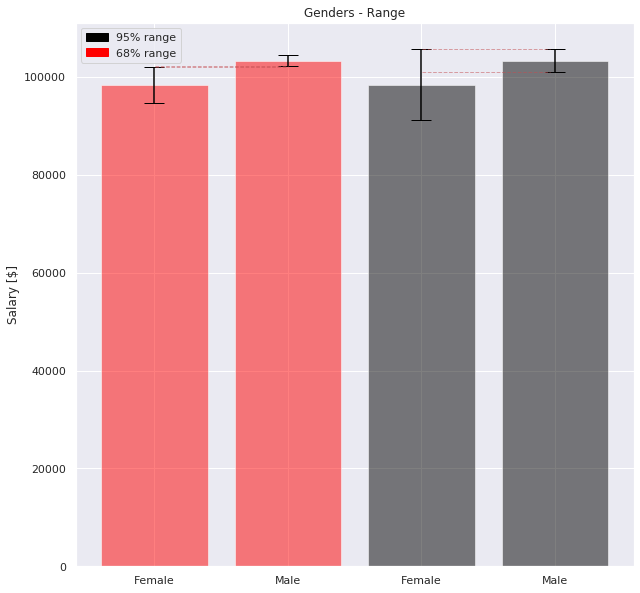

In [77]:
# Create female and male dataframe - without outliers
fig = plt.figure(figsize = (15,15))
Female_no_out = US_2019_No_Outliers[US_2019_No_Outliers.Gender == 'Female'].SalaryUSD
Male_no_out = US_2019_No_Outliers[US_2019_No_Outliers.Gender == 'Male'].SalaryUSD
#apply  mean_error_plo function
mean_error_plot(Female_no_out,Male_no_out,'Female','Male')

So, what can we do now? How about using other technique to analyse it? That is exactly what we will do! Let's compare the two means by hypothesis testing.


# T-student test

The reason for which we use the hypothesis test is to determine whether the null hypothesis is likely to be true given a sample data. We accept the null hypothesis if there is little evidence against it and we might reject the null hypothesis in favor of the alternative hypothesis if the null is unlikely.

That being said, once we determine the null and alternative hypothesis, we are able to choose the significance level. This statistic term is the probability threshoud that determines when we reject the null hypothesis.Moreover, After performing the test, the p-value helps us to interpret the results. This value is the level of marginal significance within a test representing the probability of the occurrence of a given event.


Back to our case study, lets start by setting the first hypothesis as stating that both salary means( male and female) are equal. Consequently, we will assume that the alternative hypothesis is that both means are not equal. In order to do that, we will carry out the two-sample T-test with the stats.ttest_ind() function.


*Assumptions:
We are assuming that both sample are normally distributed and have the same variance.*
 

Let's run the two sample t-test on both data with outliers and without it so that we can have some insight and consequently draw a conclusion.

In [78]:
# Import t-test function
from scipy.stats import ttest_ind

In [79]:
# T-test - data without outliers
ttest_no_outliers = stats.ttest_ind(a = Female_no_out, b = Male_no_out, equal_var= False)
ttest_no_outliers

Ttest_indResult(statistic=-1.2876559451159437, pvalue=0.20194527816923924)

In [80]:
pvalue_no_outliers = round(ttest_no_outliers[1],2)
print(f'P-value of data without outliers: {pvalue_no_outliers}')

P-value of data without outliers: 0.2


The test gives us a p-value of 0.2 which is greather than the significance value ( 0.05). In this case, we cannot reject the null hypothesis. 


Now let's carry out the test on the salary data which includes outliers on them.

In [81]:
# Filter salary by gender considering outliers
Female_salary_with_outliers = US_2019[US_2019.Gender == 'Female'].SalaryUSD
Male_salary_with_outilers = US_2019[US_2019.Gender == 'Male'].SalaryUSD

In [82]:
#T-test on data with outliers
ttest_outliers = stats.ttest_ind(a = Female_salary_with_outliers, b = Male_salary_with_outilers, equal_var= False)
ttest_outliers

Ttest_indResult(statistic=-2.38545582980193, pvalue=0.01893820844622744)

In [83]:
pvalue_outliers = round(ttest_outliers[1],2)
print(f'P-value of data without outliers: {pvalue_outliers}')

P-value of data without outliers: 0.02


As we can see above, if we keep the outliers we can say that men and women are not paid equally due tue the p-value of 0.02  which is lower than the level of significance (0.05). So, this suggests that there is indeed a difference between male and female salary when we include the outliers in the data set.


# Conclusion

After the analysis and assumptions we've made, I would say that it seems that both genders are getting paid equally in normal employment. However when we incudes the amount of people that are much better paid in our test, we can see a gap in numbers of outliers - 100% of the employees that make more money are man and 100% of the employees with the lowest salaries are women.

I know that it was a broad analysis. If we looked deep into all features, we would probably have found out reasons for that conclusion. In case you want to analyse it better, feel free to find the data on Brent’s original blog and apply all your knowledge. Please, let me know your conclusion! 